In [36]:
source("Main.R")
source("Conf.R")
source("Utilities.R")
library("factoextra")
library("maptree")
library("ggpubr")
library("ica")

library(repr)
fileDir = "/home/beraslan/jovian-work/analysisSingle/"
geneCutOff=4
targetCutOff=15
nFactors=15



In [37]:
myICAFactors = data.frame(read.csv("./../TextFiles/ICA_15_factors_effectedGenes_paper.csv",
                                   stringsAsFactors=FALSE), 
                          stringsAsFactors=FALSE)
myICAFactors_guides = myICAFactors[,grep("guide", colnames(myICAFactors))]
myICAFactors_genes = myICAFactors[,grep("gene", colnames(myICAFactors))]

selGuides = unique(unlist(myICAFactors_guides))
selGuides = selGuides[selGuides != ' ']

In [38]:
selCoefs <- read.csv("./../TextFiles/SignificantCoefMatrix.csv", row.names = 1)
selCoefs <- t(selCoefs)
KOGenes <-  colnames(selCoefs)
KOGenes <- sapply(KOGenes, function(x){strsplit(x,"_")[[1]][2]})
colnames(selCoefs) <- KOGenes

In [39]:
#guideModulesN <- data.frame(read.csv("/home/beraslan/jovian-work/analysisSingle/ME_GuideModules_7_Modules.csv", row.names = 1))
#guideModulesN$GuideName <- sapply(guideModulesN$GuideName, function(x){strsplit(as.character(x),"_")[[1]][2]})

guideModulesN <- data.frame(read.csv("./../TextFiles/ME_GuideModules_leiden_6_Modules.csv"),  row.names = 1)
rownames(guideModulesN) <- guideModulesN$GuideName 
guideModulesN$GuideGroup <- factor(guideModulesN$GuideGroup)
guideModulesN$GuideGroup <- paste0("K", guideModulesN$GuideGroup)
guideModulesN$GuideColor <- NULL

head(guideModulesN)

,GuideName,GuideGroup
,<chr>,<chr>
Aamp,Aamp,K4
Bop1,Bop1,K4
Cirh1a,Cirh1a,K4
Dcaf13,Dcaf13,K4
Grb2,Grb2,K4
Myc,Myc,K4


In [40]:
k <- icaimax(selCoefs, nc = 15, center = T)
myH <- k$S


In [41]:
dim(myH)

[1] 1041   15

In [42]:
facR2Mat = data.frame(matrix(0, nrow = 16, ncol = ncol(selCoefs)))
rownames(facR2Mat) = c(paste0("Factor_",1:15),"ALL")
colnames(facR2Mat) = colnames(selCoefs)

for(fac in 1:ncol(myH)){
    for(pert in 1:ncol(selCoefs)){
        myDF = data.frame(x=myH[,fac], y=selCoefs[,pert])
        k = lm("y ~ x", data= myDF)
        myPredict = predict(k, newdata = myDF)

        myR2 = computeR2(myDF$y, myPredict)
        
        facR2Mat[paste0("Factor_", fac), colnames(selCoefs)[pert] ] = myR2
    }
}

myDF = copy(data.frame(myH))

for(pert in 1:ncol(selCoefs)){
    myDF$y = selCoefs[,pert]
  
    k = lm("y ~ .", data= myDF)
    myPredict = predict(k, newdata = myDF)

    myR2 = computeR2(myDF$y, myPredict)
        
    facR2Mat["ALL", colnames(selCoefs)[pert] ] = myR2

}

In [43]:
facR2Mat = facR2Mat[,order(-facR2Mat["ALL",])]

Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”


In [44]:
tail(facR2Mat)

,Keap1,Cul3,Chd4,Eif3i,Tceb2,Nf1,Mtor,Eif3f,Paf1,Nedd8,⋯,Lrrc41,Maea,Traf7,Klhl3,Bcl6,Amfr,Fbxo33,Tdpoz5,Wwp1,Rnf144a
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Factor_11,0.0009913880,2.220190e-03,0.0327023104,0.0305969291,1.276807e-02,0.0055144619,0.0069340999,0.0208795408,0.003303454,0.0194397649,⋯,0.009095636,5.503830e-03,0.0101684155,2.390886e-02,0.0137041992,1.758896e-03,1.503318e-02,0.0043297277,0.0045617466,6.120122e-03
Factor_12,0.0005814450,1.258423e-03,0.0248553117,0.0617842911,4.392112e-05,0.0576044690,0.0001175606,0.0314218865,0.054154057,0.0006180760,⋯,0.016927960,4.013475e-03,0.0072757145,2.526696e-03,0.0008974387,1.713578e-03,8.260102e-03,0.0006590560,0.0009409111,3.267674e-03
Factor_13,0.0380582195,1.324421e-02,0.0219003020,0.0386615248,6.718632e-03,0.0465604045,0.0011667023,0.0426885035,0.000947960,0.0001078908,⋯,0.001860484,7.673954e-04,0.0007051813,1.231012e-06,0.0101291390,5.746404e-07,2.504909e-06,0.0007836624,0.0039469797,2.814272e-03
Factor_14,0.0006993478,5.527268e-05,0.5654042900,0.0079005903,8.105558e-03,0.0008751394,0.0015445459,0.0055568601,0.023118370,0.0061145961,⋯,0.003458307,4.722768e-05,0.0005598959,8.017416e-03,0.0041742118,3.971408e-04,3.000462e-04,0.0019488264,0.0015462640,6.845562e-05
Factor_15,0.0083101872,1.683357e-02,0.0003007833,0.0003054524,2.973596e-02,0.0001265647,0.0019487407,0.0001046279,0.068148130,0.0027271365,⋯,0.001971821,8.753394e-03,0.0036529518,3.766338e-04,0.0078287789,4.934484e-03,1.810972e-03,0.0044891890,0.0017481745,1.338008e-03
ALL,0.9604127871,9.376730e-01,0.9185589464,0.8884155923,8.718380e-01,0.8695006482,0.8591231403,0.8543748177,0.828260207,0.8264526955,⋯,0.115039288,1.137777e-01,0.1135885515,1.117487e-01,0.1020660558,9.439486e-02,9.085775e-02,0.0755490690,0.0629380534,5.953281e-02


In [45]:
allExp = facR2Mat["ALL",]
allExp

,Keap1,Cul3,Chd4,Eif3i,Tceb2,Nf1,Mtor,Eif3f,Paf1,Nedd8,⋯,Lrrc41,Maea,Traf7,Klhl3,Bcl6,Amfr,Fbxo33,Tdpoz5,Wwp1,Rnf144a
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ALL,0.9604128,0.937673,0.9185589,0.8884156,0.871838,0.8695006,0.8591231,0.8543748,0.8282602,0.8264527,⋯,0.1150393,0.1137777,0.1135886,0.1117487,0.1020661,0.09439486,0.09085775,0.07554907,0.06293805,0.05953281


In [46]:
length(allExp[allExp < 0.15])

[1] 25

In [47]:
length(allExp)

[1] 329

In [48]:
length(allExp[allExp > 0.9])

[1] 3

In [49]:
allExp[allExp > 0.9]

[1] 0.9604128 0.9376730 0.9185589

In [50]:
summary(unlist(allExp))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.05953 0.20992 0.29281 0.34837 0.43778 0.96041 

In [51]:
write.csv(facR2Mat, "ExplainedVariancePerFactor.csv")

In [52]:
allExpVar = unlist(head(facR2Mat["ALL",]))

In [53]:
length(allExpVar)

[1] 329

In [54]:
k = sapply(facR2Mat[,"Rfwd2"], function(x){round(x, digits = 2)})
names(k) = rownames(facR2Mat)
k

Factor_1  Factor_2  Factor_3  Factor_4  Factor_5  Factor_6  Factor_7  Factor_8 
     0.00      0.01      0.38      0.00      0.03      0.01      0.00      0.01 
 Factor_9 Factor_10 Factor_11 Factor_12 Factor_13 Factor_14 Factor_15       ALL 
     0.26      0.01      0.08      0.00      0.00      0.00      0.00      0.80

In [55]:
length(allExpVar[allExpVar>0.2])

[1] 257

In [56]:
highExp = names(allExpVar[allExpVar>0.25])

In [57]:
annoCols<-list(GeneGroup=c(G0='#A6CEE3',
                           G1='#1F78B4',
                           G2='#B2DF8A',
                           G3='#33A02C', 
                           G4='#FB9A99', 
                           G5='#FDBF6F', 
                           G6='#FF7F00', 
                           G7='#CAB2D6',
                           G8='#6A3D9A', 
                           G9='#FFFF99', 
                           G10="#B5651D" ),
                 GuideGroup=c(K0="#1f77b4",
                              K1="#ff7f0e",
                              K2="#279e68",
                              K3="#d62728", 
                              K4="#aa40fc", 
                              K5="#8c564b"))

In [58]:
# options(repr.plot.width=28, repr.plot.height=6)
# #facR2MatPlot = copy(data.frame(facR2Mat[,highExp]))
# facR2MatPlot = copy(data.frame(facR2Mat[,highExp]))
# facR2MatPlot[facR2MatPlot > 0.2] = 0.2
# facR2MatPlot[facR2MatPlot < 0.05] = 0.05

# kk = pheatmap((facR2MatPlot[1:15,]),
#          cluster_cols = TRUE,
#          cluster_rows = FALSE,
#          clustering_method="ward.D2",
#          clustering_distance_rows="euclidean", colorRampPalette(c("white", "orange", "red"))(100))

# facR2MatPlot = facR2MatPlot[,kk$tree_col$order]

# annotDFcol <- guideModulesN[colnames(facR2MatPlot),]
# annotDFcol$GuideName = NULL
# head(annotDFcol)

# pheatmap(facR2MatPlot,
#          cluster_cols = TRUE,
#          cluster_rows = FALSE,
#          annotation_col = annotDFcol,
#          annotation_colors = annoCols,
#          clustering_method="ward.D2",
#          clustering_distance_rows="euclidean", colorRampPalette(c("white", "orange", "red"))(100))



In [60]:
dim(facR2Mat)

[1]  16 329

In [62]:
length(highExp)

[1] 203

,GuideGroup
,<chr>
Keap1,K2
Cul3,K2
Chd4,K1
Eif3i,K1
Tceb2,K2
Nf1,K3


png 
  2

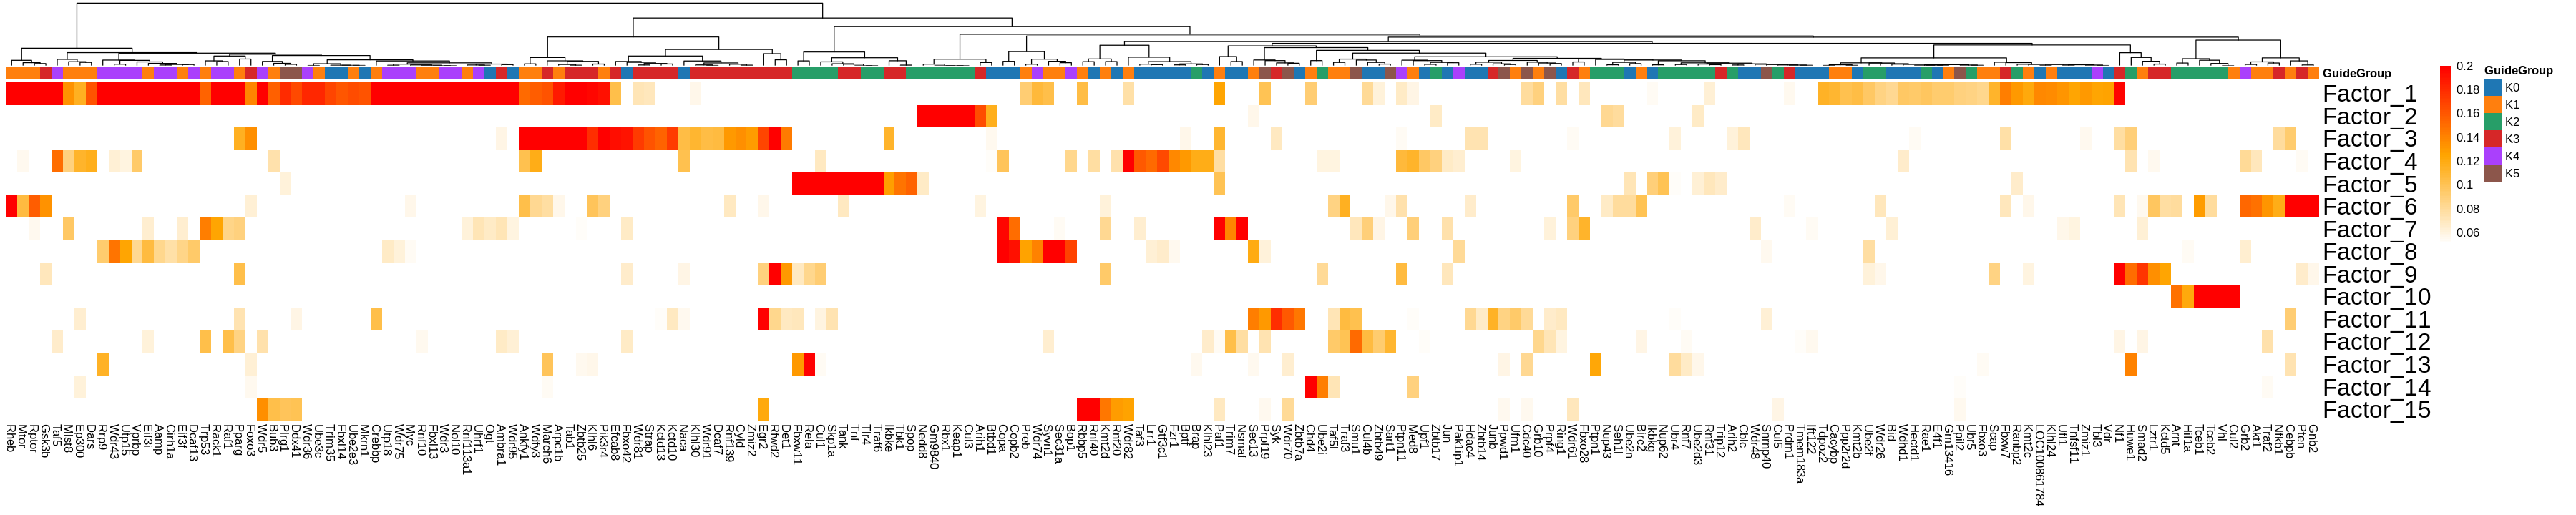

In [63]:
options(repr.plot.width=30, repr.plot.height=6)
facR2MatPlot = copy(facR2Mat[,highExp])
facR2MatPlot[facR2MatPlot > 0.2] = 0.2
facR2MatPlot[facR2MatPlot < 0.05] = 0.05
#kk = data.frame(t(facR2MatPlot[,names(allExpVarLarge)]))
# kk$GuideGroup = factor(annotDFcol[rownames(kk),], levels=c('KOGroup_4', 'KOGroup_0', 'KOGroup_1', 'KOGroup_5', 'KOGroup_3', 'KOGroup_2'))
# kk = kk[order(-kk$Factor_1, -kk$Factor_3, -kk$Factor_2, -kk$Factor_4, -kk$Factor_5, -kk$Factor_6, -kk$Factor_7, -kk$Factor_8,
#              -kk$Factor_9, -kk$Factor_10, -kk$Factor_11, -kk$Factor_12,-kk$Factor_13,-kk$Factor_14,-kk$Factor_15, kk$GuideGroup),]
# kk$GuideGroup = NULL

annotDFcol <- guideModulesN[colnames(facR2MatPlot),]
annotDFcol$GuideName = NULL
head(annotDFcol)

xx  = pheatmap(facR2MatPlot[1:15,],
         cluster_cols = TRUE,
         cluster_rows = FALSE,
         annotation_col = annotDFcol,
         annotation_colors = annoCols,
         clustering_method="ward.D2",
         fontsize_row=20,
         clustering_distance_rows="euclidean", colorRampPalette(c("white", "orange", "red"))(100))

save_pheatmap_pdf(xx, "Figure_4A.pdf", width=28, height=6)

In [64]:
dim(facR2MatPlot)

[1]  16 203

In [29]:
selGenes %in% colnames(facR2Mat)

[1] TRUE TRUE TRUE TRUE TRUE

,GuideGroup
,<chr>
Rbx1,K2
Rfwd2,K3
Cul4b,K0
Det1,K3
Ddb1,K0


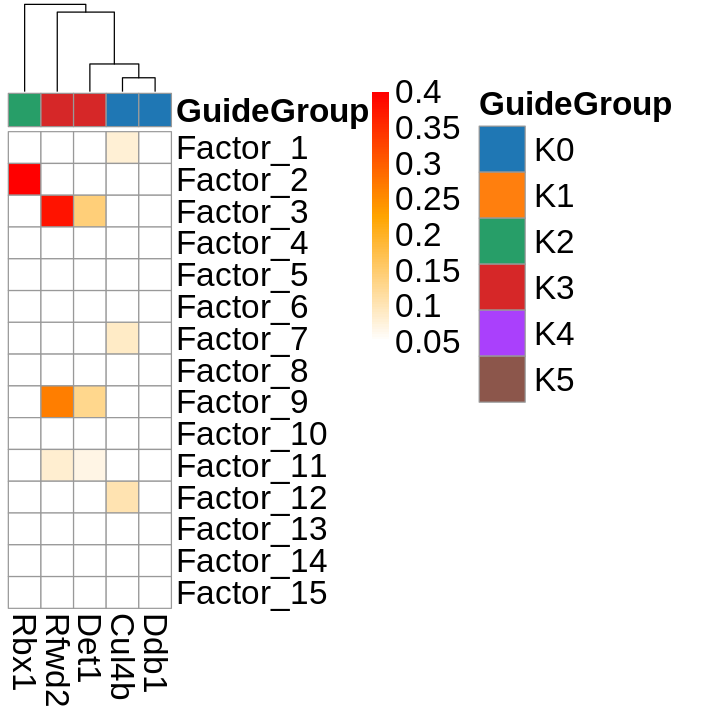

In [37]:
options(repr.plot.width=6, repr.plot.height=6)

selGenes = c("Rbx1", "Rfwd2", "Cul4b", "Det1", "Ddb1" )
facR2MatPlot = copy(facR2Mat[,selGenes])
facR2MatPlot[facR2MatPlot > 0.4] = 0.4
facR2MatPlot[facR2MatPlot < 0.05] = 0.05

annotDFcol <- guideModulesN[colnames(facR2MatPlot),]
annotDFcol$GuideName = NULL
head(annotDFcol)

xx  = pheatmap(facR2MatPlot[1:15,],
         cluster_cols = TRUE,
         cluster_rows = FALSE,
         annotation_col = annotDFcol,
         annotation_colors = annoCols,
         clustering_method="ward.D2",
         fontsize=20,
         clustering_distance_rows="euclidean", colorRampPalette(c("white", "orange", "red"))(100))


In [ ]:
facR2MatPlot[]

,GuideGroup
,<chr>
Rheb,K1
Mtor,K1
Rptor,K1
Gsk3b,K3
Taf5,K4
Mlst8,K1


png 
  2

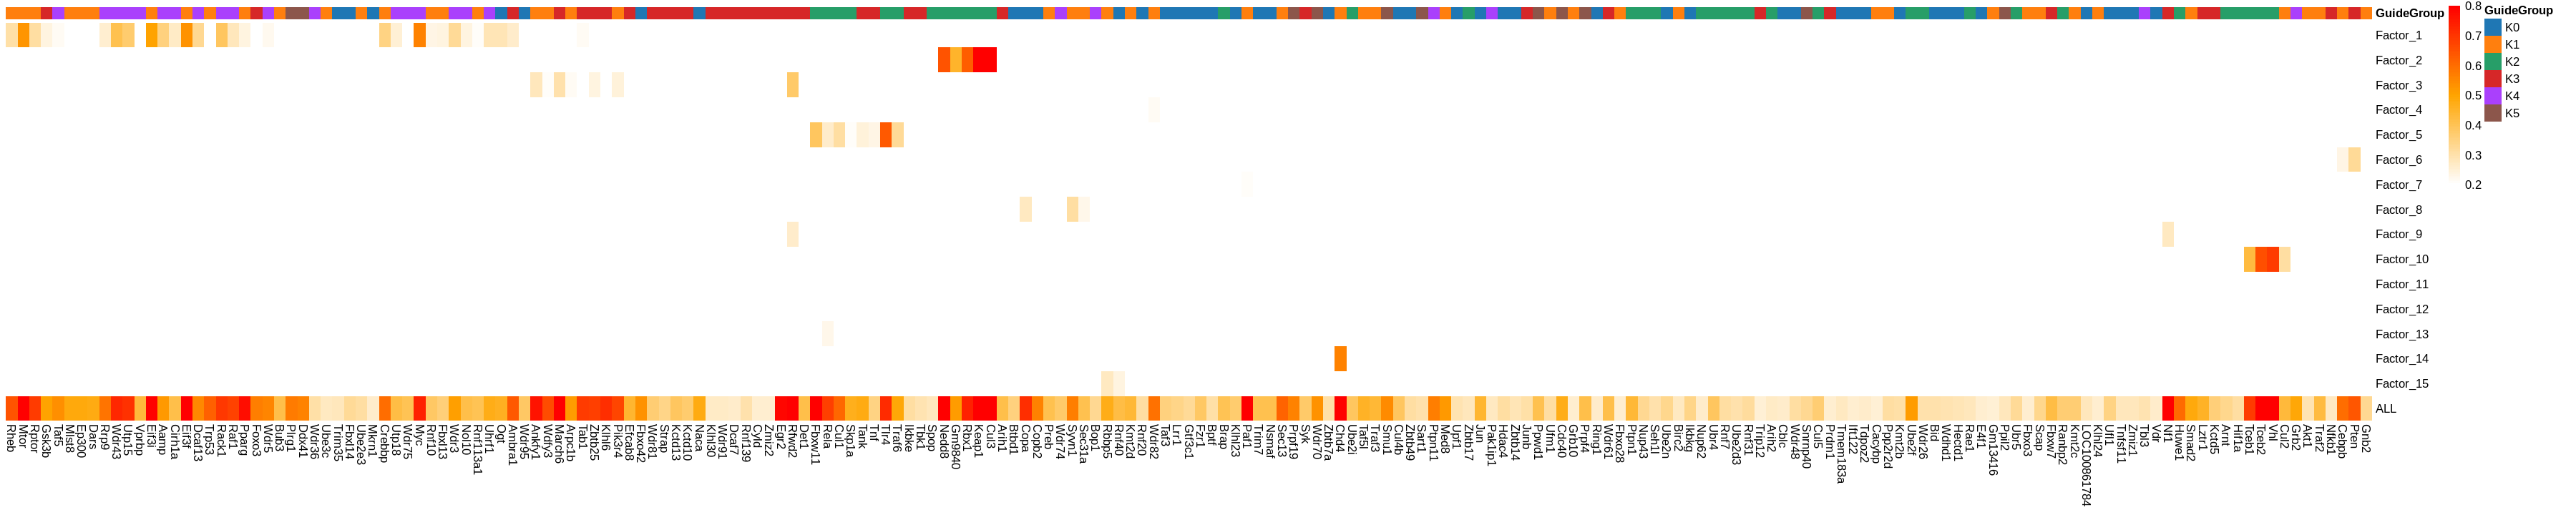

In [75]:
facR2MatPlot = copy(facR2Mat[,highExp])
facR2MatPlot = facR2MatPlot[,xx$tree_col$order]

facR2MatPlot[facR2MatPlot > 0.8] = 0.8

facR2MatPlot[facR2MatPlot < 0.2] = 0.2

annotDFcol <- guideModulesN[colnames(facR2MatPlot),]
annotDFcol$GuideName = NULL
head(annotDFcol)

kk = pheatmap(facR2MatPlot,
         cluster_cols = FALSE,
         cluster_rows = FALSE,
         annotation_col = annotDFcol,
         annotation_colors = annoCols,
         clustering_distance_rows="euclidean", colorRampPalette(c("white", "orange", "red"))(100))

save_pheatmap_pdf(kk, "Figure_4A_2.pdf", width=28, height=6)


In [56]:
head(guideModulesN)

,GuideName,GuideGroup
,<chr>,<chr>
Aamp,Aamp,KOGroup_4
Bop1,Bop1,KOGroup_4
Cirh1a,Cirh1a,KOGroup_4
Dcaf13,Dcaf13,KOGroup_4
Grb2,Grb2,KOGroup_4
Myc,Myc,KOGroup_4


In [87]:
selGuides[which(selGuides %ni% colnames(facR2MatPlot))]

[1] "Ddb1"   "Kctd21" "Ing3"   "Tceb3"  "Kcmf1"  "Ybx1"   "Mycbp2" "Dpf2"  
 [9] "Kdm5c"  "Hira"   "Pias1"  "Zfp106" "Wdr1"   "Kat6a"  "Socs3"

In [89]:
length(selGuides)

[1] 177